In [222]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [223]:
N_CLASSES = 5
CUTS = 4
PREDICT_V = 'ClassId'
FILE_NAME = f'./data_{N_CLASSES}_{CUTS}_cuts.csv'
data = pd.read_csv(FILE_NAME)
print(f'{FILE_NAME}')

./data_5_4_cuts.csv


## **DATA PREPROCESSING**

In [224]:
X = data.iloc[:,:-2]        # feature columns
Y = data.iloc[:,-2:-1]      # predict variable column

In [225]:
# normalize data
X = (X-X.mean())/X.std()

### **DATA REPORTING**

In [226]:
def data_reporting(X, Y):
    n, c = X.shape
    print(f'Training examples: {n}')
    for i in range(N_CLASSES):
        d0 = data[data[PREDICT_V] == i]
        r, c = d0.shape
        print(f'\tClass-id {i} : {r} \t{round(r*100/n)} %')

In [227]:
data_reporting(X, Y)

Training examples: 8657
	Class-id 0 : 195 	2 %
	Class-id 1 : 2158 	25 %
	Class-id 2 : 2466 	28 %
	Class-id 3 : 1599 	18 %
	Class-id 4 : 2239 	26 %


In [228]:
def K_Fold_Validation(classifier, X, Y):
    acc_score = classifier.score(X_test, Y_test)
    print(f'accuracy score: {acc_score}')

    # performing K-fold cross validation
    folds = 10
    cv_arr = cross_val_score(classifier, X, Y.values.ravel(), cv=folds)
    k_fold_mean_score = cv_arr.mean()

    print(f'k-fold mean error:   {1 - k_fold_mean_score}')
    print(f'k-fold mean score:   {k_fold_mean_score}')
    
    # confussion matrix
    cm = confusion_matrix(Y_test, classifier.predict(X_test))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot()
    
    cm_normalize = normalize(cm, norm='l1')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalize, display_labels=classifier.classes_)
    disp.plot()

    # accuracy report for each class
    arr = np.array(cm)
    for i in range(N_CLASSES):
        print(f'\taccuracy on class {i}-th: {round(arr[i,i]/np.sum(arr[i,:]), 5)} %')

In [229]:
linear_svm = LinearSVC(dual=False)

In [230]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
linear_svm.fit(X_train, Y_train.values.ravel())

LinearSVC(dual=False)

accuracy score: 0.775211701308699
k-fold mean error:   0.26635677955919834
k-fold mean score:   0.7336432204408017
	accuracy on class 0-th: 0.05085 %
	accuracy on class 1-th: 0.69066 %
	accuracy on class 2-th: 0.72667 %
	accuracy on class 3-th: 0.87061 %
	accuracy on class 4-th: 0.90882 %


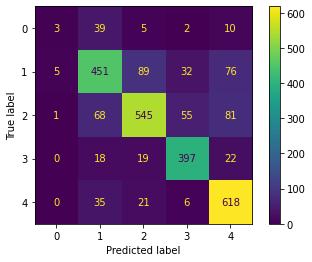

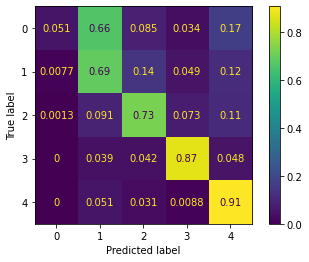

In [231]:
K_Fold_Validation(linear_svm, X, Y)